In [1]:
# arquivos disponiveis:
# 00000e74ad.npy 00007a006a.npy 0000c3b9c9.npy 00010beb4a.npy 00014b7a9d.npy 0001808ecc.npy
# 00001f4945.npy 0000a38978.npy 0000d61b7b.npy 000118b40d.npy 0001616241.npy 0000661522.npy
# 0000bb9f3e.npy 0001016d12.npy 0001388506.npy 00017d3cf3.npy

import numpy as np
from gwpy.timeseries import TimeSeries
from gwpy.time import to_gps

file = '00000e74ad.npy'
path = f'../data/{file}'

signals = np.load(path)

In [2]:
size = 2**12
gps = to_gps('Apr 21 1991 02:30:45.391')
sample_rate = 2**11

time_series = TimeSeries(signals[0, :], t0=gps, sample_rate=sample_rate, name= 'strain')

In [ ]:
fftlength = 2 # padrao = 2
window = 'tukey' # padrao = 'hanning'
alpha = 0.5 # alpha = 1 equivale a Hann e alpha = 0 equivale a retangular
method = 'median'

preproc = time_series.whiten(fftlength=fftlength, window=(window, alpha), method=method)

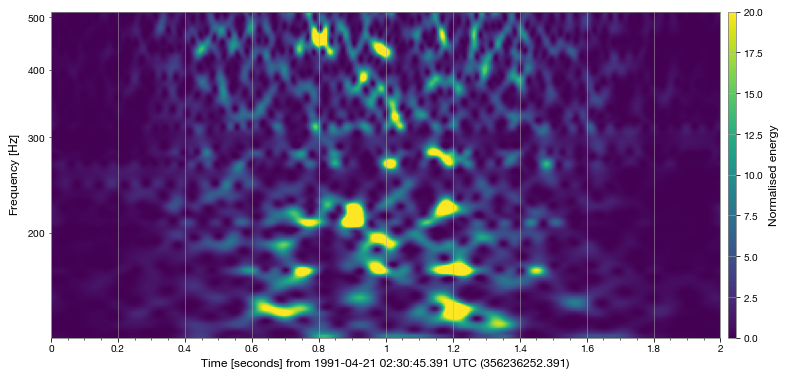

In [17]:
qrange = (32, 64) # padrao = (4, 64)
frange = (128, 512) # padrao automatico

plot = time_series.q_transform(qrange, frange, method=('tukey', 0.8)).plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")
plot.colorbars[0].mappable.set_clim(0,20)